#Self Organizing Map

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=0db2700c8fa1b1f6a7dab252a5b8920e99e6996734f70d652c85859029a8aa50
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built MiniSom


### Importing the libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [6]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


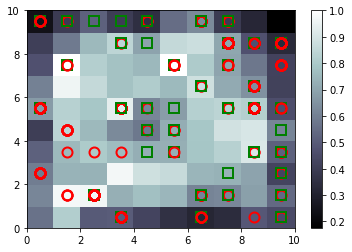

In [23]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [41]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,7)],mappings[(5,7)]),axis = 0 )
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [42]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15789611
15668679
15738487
15773421
15682686
15781875
15809837
15636521
15761554
15707602
15811690
15815095
15720725
15567834
15672912
15694677
15598614
15631267
15611189
15759387
15712483
15698522
15608595
15586183
15666166
15605872
15665087
